Equilibrium Volume: 16.607801480016086 Å^3
Equilibrium lattice parameter: 4.050021966452301 Å
Curvature: 0.029576535717526813 eV/Å^6
Bulk Modulus: 78.69914810433568 GPa


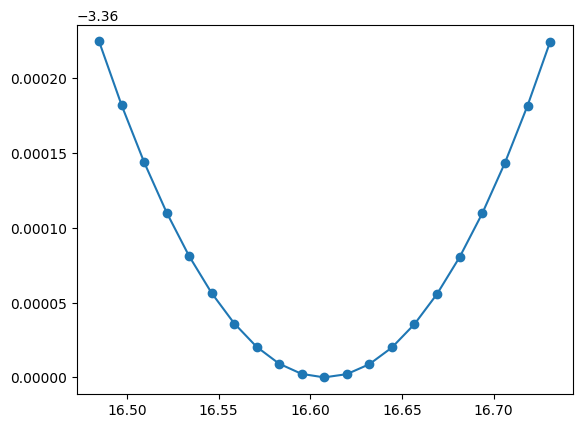

In [1]:
import numpy as np
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt


data = np.loadtxt("D:\MM_309\Week_3\loop\LatfccAl.txt")

# Given dataset: lattice parameters and energies
lattice_parameters = data[:,0]
energies =  data[:,1]

# Convert lattice parameters to volumes (Å^3)
volumes = np.array(lattice_parameters)**3
vol_atom=volumes/4

# Fit a quadratic polynomial to the energy-volume data
coeffs = np.polyfit(vol_atom, energies, 2)

#generating fit data
E1= coeffs[2] + coeffs[1]*vol_atom +coeffs[0]* (vol_atom**2)


# Calculate the curvature (second derivative) of the polynomial at the equilibrium volume
curvature = 2 * coeffs[0]

# Calculate the equilibrium volume
equilibrium_volume = -coeffs[1] / (2 * coeffs[0])
equilibrium_lattice_p=(4*equilibrium_volume)**(1/3)

# Calculate the bulk modulus (in GPa)
bulk_modulus = equilibrium_volume * curvature * 160.217733  # Conversion factor from eV/Å^3 to GPa

print("Equilibrium Volume:", equilibrium_volume, "Å^3")
print("Equilibrium lattice parameter:", equilibrium_lattice_p, "Å")
print("Curvature:", curvature, "eV/Å^6")
print("Bulk Modulus:", bulk_modulus, "GPa")


#plotting the original data and fit data
plt.plot(vol_atom, E1)
plt.scatter(vol_atom, energies)
plt.savefig("E_vs_a.png")
